## EPITA International Programs Department<br>Academic Year: 2020-2021<br>AI in signal and audio processing course

# <center> <br><br>PRACTICAL WORK: SESSION 2<br>DEEP LEARNING FOR AUDIO AND SPEECH PROCESSING<br></center>

In [32]:
%matplotlib inline
import seaborn
import numpy as np, scipy, matplotlib.pyplot as plt, sklearn, pandas, librosa, librosa.display
import urllib, IPython.display, os.path
plt.rcParams['figure.figsize'] = (14, 5)
import audioread
import tensorflow as tf

# Exercise: Genre Recognition

## Goals

1. Anayze audio signals
2. Extract features from an audio signal.
3. Train a genre classifier.
4. Use the classifier to classify the genre in a song.
5. Train and use the classifier on a genre database.
6. Improve the classifier using different models.

## Step 1: Retrieve Audio

Download an audio file onto your local machine.

In [33]:
filename_brahms = r'./audio/brahms_suite_op10_adagio.wav'
filename_busta = r'./audio/busta_rhymes_touch_it.wav'

Load 60 seconds of an audio file:

In [34]:
x_brahms, fs_brahms = librosa.load(filename_brahms, duration=60)
x_busta, fs_busta = librosa.load(filename_busta, duration=60)

Play the audio files:

In [35]:
play_brahms = IPython.display.Audio(x_brahms, rate=fs_brahms) 
play_busta  = IPython.display.Audio(x_busta, rate=fs_busta)
title_pbrahms = IPython.display.Markdown('**Brahms audio track:**')
title_pbusta  = IPython.display.Markdown('**Busta audio track:**')
display(title_pbrahms,play_brahms,title_pbusta,play_busta)

**Brahms audio track:**

**Busta audio track:**

Plot the time-domain waveform of the waveforms. In what ways does the time-domain waveform of the two audio files look different ? What differences in musical attributes might this reflect? 

C:\Users\asiam\AppData\Local\Temp\ipykernel_26312\2534904892.py:2: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(x_brahms, fs_brahms)
C:\Users\asiam\AppData\Local\Temp\ipykernel_26312\2534904892.py:6: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(x_busta, fs_busta)


Text(0.5, 1.0, 'temporal waveform - Busta')

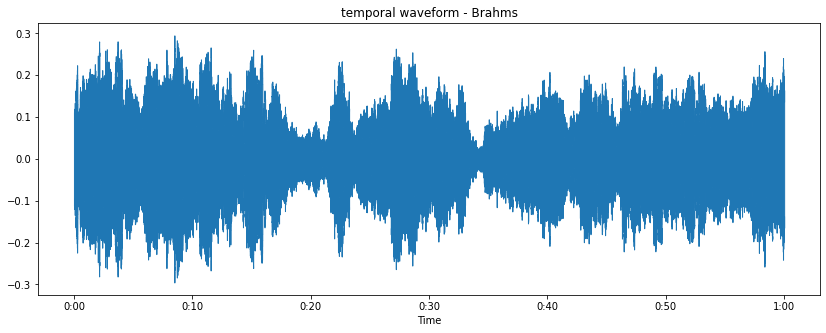

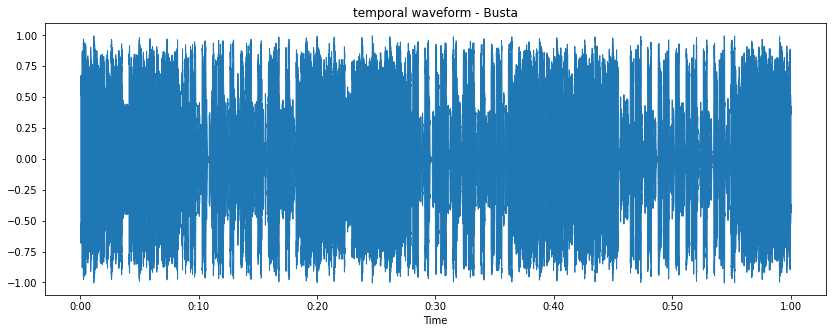

In [36]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x_brahms, fs_brahms)
plt.title('temporal waveform - Brahms')

plt.figure(figsize=(14, 5))
librosa.display.waveshow(x_busta, fs_busta)
plt.title('temporal waveform - Busta')

Plot the spectrogram of the waveforms. What additional insights are gained from plotting the spectrogram?

In [38]:
hop_length = 256

melspect_brahms = librosa.feature.melspectrogram(x_brahms, sr=fs_brahms, n_fft=4096, hop_length=hop_length)
log_melspec_brahms = librosa.amplitude_to_db(melspect_brahms, ref=np.max)

melspect_busta = librosa.feature.melspectrogram(x_busta, sr=fs_busta, n_fft=4096, hop_length=hop_length)
log_melspec_busta = librosa.amplitude_to_db(melspect_busta, ref=np.max)

C:\Users\asiam\AppData\Local\Temp\ipykernel_26312\1765814716.py:3: FutureWarning: Pass y=[-0.05651855 -0.07931519 -0.09609985 ...  0.04818726  0.037323
  0.01589966] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect_brahms = librosa.feature.melspectrogram(x_brahms, sr=fs_brahms, n_fft=4096, hop_length=hop_length)
C:\Users\asiam\AppData\Local\Temp\ipykernel_26312\1765814716.py:6: FutureWarning: Pass y=[-0.5480957  -0.54907227 -0.54992676 ...  0.26434326  0.08978271
  0.17404175] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect_busta = librosa.feature.melspectrogram(x_busta, sr=fs_busta, n_fft=4096, hop_length=hop_length)


Text(0.5, 1.0, 'mel-frequency power spectrogram - Busta')

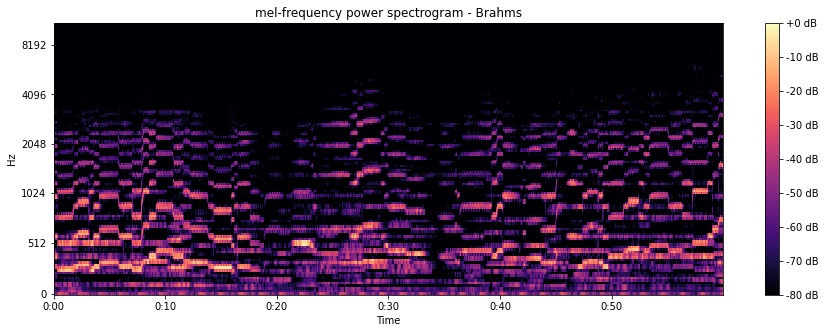

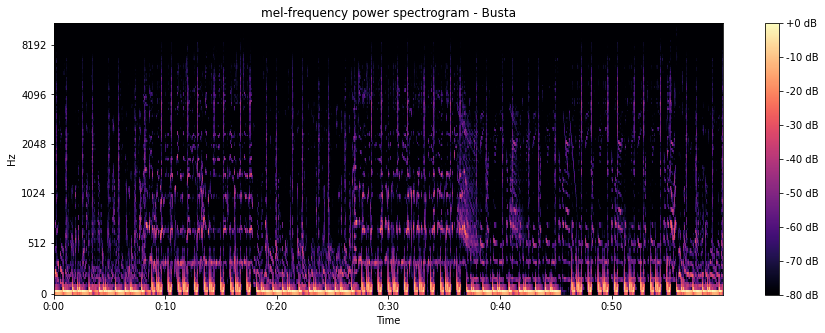

In [39]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(log_melspec_brahms, sr=fs_brahms, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('mel-frequency power spectrogram - Brahms')

plt.figure(figsize=(15, 5))
librosa.display.specshow(log_melspec_busta, sr=fs_busta, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('mel-frequency power spectrogram - Busta')

## Step 2: Extract Features

For each segment, compute the MFCCs. Experiment with `n_mfcc` to select a different number of coefficients, e.g. 12. <br>
Using [`librosa.feature.mfcc`](https://librosa.org/doc/main/generated/librosa.feature.mfcc.html).

In [40]:
from librosa.feature import mfcc

n_mfcc = 24
nfft = 4096
hop_length=1024
### Write code here.###
mfcc_brahms = mfcc(x_brahms,sr=fs_brahms,n_mfcc=n_mfcc,hop_length=hop_length).T
mfcc_busta = mfcc(x_busta,sr=fs_busta,n_mfcc=n_mfcc,hop_length=hop_length).T
###

print(mfcc_brahms.shape)
print(mfcc_busta.shape)

(1292, 24)
(1292, 24)


C:\Users\asiam\AppData\Local\Temp\ipykernel_26312\322944278.py:7: FutureWarning: Pass y=[-0.05651855 -0.07931519 -0.09609985 ...  0.04818726  0.037323
  0.01589966] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_brahms = mfcc(x_brahms,sr=fs_brahms,n_mfcc=n_mfcc,hop_length=hop_length).T
C:\Users\asiam\AppData\Local\Temp\ipykernel_26312\322944278.py:8: FutureWarning: Pass y=[-0.5480957  -0.54907227 -0.54992676 ...  0.26434326  0.08978271
  0.17404175] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_busta = mfcc(x_busta,sr=fs_busta,n_mfcc=n_mfcc,hop_length=hop_length).T


We transpose the result to accommodate scikit-learn which assumes that each row is one observation, and each column is one feature dimension. <br>
Scale the features to have zero mean and unit variance, using  [`sklearn.preprocessing.StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html):

In [45]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler(with_mean=True,with_std=True)
### Write code here.###
mfcc_brahms_scaled = scaler.fit_transform(mfcc_brahms)
mfcc_busta_scaled = scaler.fit_transform(mfcc_busta)
###

Plot features ready to be processed:

Text(0.5, 1.0, 'mfcc features - Busta')

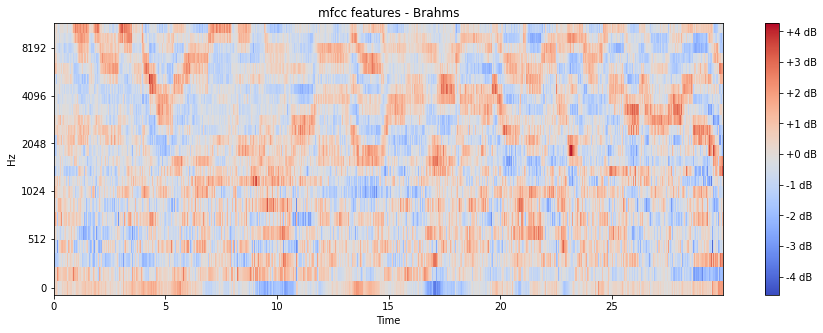

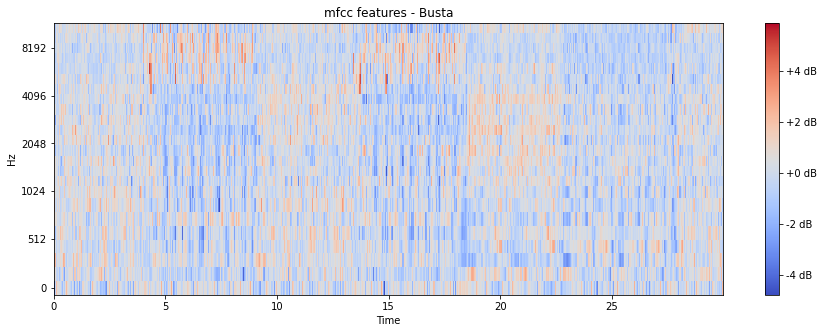

In [46]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(mfcc_brahms_scaled.T, sr=fs_brahms, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('mfcc features - Brahms')

plt.figure(figsize=(15, 5))
librosa.display.specshow(mfcc_busta_scaled.T, sr=fs_busta, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('mfcc features - Busta')

## Step 3: Train and Run Classifier

### Classifier training with SVM

Concatenate all of the scaled feature vectors of each sound track into one feature table.

In [73]:
### Write code here.###
features=np.vstack((mfcc_brahms_scaled,mfcc_busta_scaled))

(2584, 24)


Construct a vector of ground-truth labels, where 0 refers to the first audio file, and 1 refers to the second audio file.

In [77]:
### Write code here.###
labels = np.vstack((np.zeros((mfcc_brahms_scaled.shape[0],1)),np.ones((mfcc_busta_scaled.shape[0],1))))
###
print(labels.shape)

(2584, 1)


In [123]:
#test train splitting
Xtrain,Xtest,ytrain,ytest=sklearn.model_selection.train_test_split(features,labels,test_size=0.33,random_state=42)

Create a classifer model object using [`sklearn.svm.SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html):

In [131]:
### Write code here.###
model = sklearn.svm.SVC(kernel='poly')
###

Train the classifier:

In [132]:
### Write code here.###
###
model.fit(Xtrain,ytrain.ravel())


SVC(kernel='poly')

Compute accuracy score of the classifier on the training data:

In [134]:
### Write code here.###

score = sklearn.metrics.accuracy_score(model.predict(Xtest),ytest)
# score = sklearn.metrics.accuracy_score(model.predict(Xtrain),ytrain)
###
print(score)

0.9144196951934349


### Run classifier and evaluate accuracy

To test the classifier, we will run it on other soundtracks of the same artists, Johanes Brahms and Busta Rhymes. <br>
Download an new audio file onto your local machine:

In [ ]:
filename_brahms = r'./audio/brahms_violin_concerto_dm_op77.wav'
filename_busta = r'./audio/busta_rhymes_hits_for_days.wav'

x_brahms_test, fs_brahms = librosa.load(filename_brahms, duration=60)
x_busta_test, fs_busta = librosa.load(filename_busta, duration=60)

Listen to those new soundtracks:

In [ ]:
play_brahms = IPython.display.Audio(x_brahms_test, rate=fs_brahms) 
play_busta  = IPython.display.Audio(x_busta_test, rate=fs_busta)
title_pbrahms = IPython.display.Markdown('**Brahms 2nd audio track:**')
title_pbusta  = IPython.display.Markdown('**Busta 2nd audio track:**')
display(title_pbrahms,play_brahms,title_pbusta,play_busta)

Compute MFCCs from both of the test audio tracks:

In [ ]:
n_mfcc = 24
nfft = 4096
hop_length=1024
### Write code here.###
mfcc_brahms_test = .T
mfcc_busta_test  = .T
###

Scale the MFCCs using the previous scaler:

In [ ]:
### Write code here.###
mfcc_brahms_test_scaled = 
mfcc_busta_test_scaled  = 
###

Concatenate all test features and test labels and compute predictions on this test set:

In [ ]:
### Write code here.###
test_features = 
test_labels   =

###

Finally, compute the accuracy score of the classifier on the test data:

In [ ]:
### Write code here.###
score = 
###
print(score)

## Step 4: Classification on 5s extracts

Currently, the classifier returns one prediction for every MFCC vector in the test audio signal. Can you modify the procedure above such that the classifier returns a single prediction for a 5-second excerpt?

### Classifier training

Here is a usefull function that will enable to group mfccs by fixed-length temporal windows.

In [ ]:
def mfcc_group(mfcc,sig_len,sig_fs,nfft,hop_len,grp_window_len_in_sec):
    # sig_len : number of samples of the whole temporal signal
    
    n_mfcc = mfcc.shape[-1]
    
    # Get the number of frames in each window (with an overlap of hop_length). 
    # We will keep the integer part only. 
    nb_frames_in_grp_window = (grp_window_len_in_sec*sig_fs-nfft)//hop_len+1
    
    # Get the total number of windows.
    # For sake of simplicity we will consider a window size smaller than `grp_window_len_in_sec`,
    #     in order to get a whole number of frames in each window
    nb_grp_window = sig_len//((nb_frames_in_grp_window-1)*hop_len+nfft)
    
    # Get the number of frames to consider to get a whole number of windows.
    nb_frames = nb_grp_window * nb_frames_in_grp_window
    
    # Then group mfccs by windows and return the result
    mfcc_grp = np.reshape(mfcc[:nb_frames,:],[nb_grp_window,nb_frames_in_grp_window,n_mfcc])
    
    return mfcc_grp

Group mfccs per windows of 5s, for each soundtrack. <br>

In [ ]:
### Write code here.###
mfcc_5s_brahms_scaled = 
mfcc_5s_busta_scaled  = 
###

Concatenate all of the scaled feature vectors into one feature table, and all labels into a label vector.

In [ ]:
### Write code here.###
features_5s_pred = 
labels_5s_pred   = 
###

Create classifier model object and train it.

In [ ]:
### Write code here.###
model_5s = 

###

Compute accuracy score of the classifier on the training data:

In [ ]:
### Write code here.###
score = 
###
print(score)

### Run classifier and evaluate accuracy

Group mfccs per windows of 5s, for each soundtrack. <br>

In [578]:
### Write code here.###
mfcc_5s_brahms_test_scaled = 
mfcc_5s_busta_test_scaled  = 
###

Concatenate all of the scaled feature vectors into one feature table, and all labels into a label vector. <br>
Compute predictions.

In [579]:
### Write code here.###
features_test_5s_pred = 
labels_test_5s_pred   = 

###

Finally, compute the accuracy score of the classifier on the test data:

In [ ]:
### Write code here.###
score = 
###
print(score)

## Step 5: Download music genre database

In [ ]:
#importing libraries

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import librosa
import matplotlib.pyplot as plt

import os
from PIL import Image
from pathlib import Path
import csv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow import keras
import librosa.display

import random

In [ ]:
n_mfcc = 24
nfft = 4096
hop_length=1024

In [ ]:
songname = f'./audio/genres/blues/blues.00000.wav'
song, sr = librosa.load(songname, mono=True, duration=10, offset=0)

play_song = IPython.display.Audio(song, rate=sr) 
title_song  = IPython.display.Markdown('**"blues.00000.wav":**')
display(title_song,play_song)

In [ ]:
dataset = []
dataset_grp = []
genres = {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 
        'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}

for genre, genre_number in genres.items():
    for filename in os.listdir(f'./audio/genres/{genre}'):
        songname = f'./audio/genres/{genre}/{filename}'
        for index in range(6): #14
            y, sr = librosa.load(songname, mono=True, duration=4, offset=index*4)
            melspect = librosa.feature.melspectrogram(y, sr=sr, n_fft=4096, hop_length=hop_length)
            log_melspec = librosa.amplitude_to_db(melspect, ref=np.max)
            mfcc = librosa.feature.mfcc(None, sr=sr, n_mfcc=n_mfcc, n_fft=nfft, S=log_melspec).T
            mfcc_grp = mfcc_group(mfcc,len(y),sr,nfft,hop_length,2)
            dataset.append( (mfcc, genre_number) )
            dataset_grp.append( (mfcc_grp, genre_number) )
            
print(len(dataset))

In [ ]:
import random

current_dataset = dataset
n_frame = len(current_dataset[0][0])
n_feature = len(current_dataset[0][0][0])

random.shuffle(current_dataset)

size_train = np.int_(len(current_dataset)*0.66)
size_valid = np.int_(len(current_dataset)*0.165)
size_test  = len(current_dataset) - size_train - size_valid

train = current_dataset[:size_train]
valid = current_dataset[size_train:size_train+size_valid]
test = current_dataset[size_train+size_valid:]

X_train, Y_train = zip(*train)
X_valid, Y_valid = zip(*valid)
X_test, Y_test = zip(*test)

# Reshape for CNN input
X_train = np.array([x.reshape( (n_feature, n_frame, 1) ) for x in X_train])
X_valid = np.array([x.reshape( (n_feature, n_frame, 1) ) for x in X_valid])
X_test  = np.array([x.reshape( (n_feature, n_frame, 1) ) for x in X_test])

Y_train = np.array([y for y in Y_train])
Y_valid = np.array([y for y in Y_valid])
Y_test  = np.array([y for y in Y_test])

In [ ]:
train_mfcc = np.reshape(np.transpose(X_train,(0,2,1,3)),(size_train,n_frame*n_mfcc))
train_labels = Y_train

scaler_train = sklearn.preprocessing.StandardScaler()
train_mfcc_scaled = scaler_train.fit_transform(train_mfcc)

from sklearn.svm import LinearSVC
model_svm = LinearSVC(random_state=0, tol=1e-0,multi_class='ovr',verbose=1)
model_svm.fit(train_mfcc, train_labels) 

In [ ]:
test_mfcc = np.reshape(np.transpose(X_test,(0,2,1,3)),(size_test,n_frame*n_mfcc))
test_labels = Y_test

scaler_test = sklearn.preprocessing.StandardScaler()
test_mfcc_scaled = scaler_test.fit_transform(test_mfcc)
test_predicts = model_svm.predict(test_mfcc_scaled)

Plot the confusion matrix of the test set prediction.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

### Write code here.###
confusion_matrix = 
###

df_cm = pd.DataFrame(confusion_matrix,index=genres.items(),columns=genres.items())
plt.figure(figsize=(10, 7))
sn.set(font_scale=1.1) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}) # font size
plt.show()

In [ ]:
### Write code here.###
score = 
###
print(score)

## Step 6: Improve the model

### CNN and RNN networks

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import Input, backend, Model
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Lambda
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten, GRU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Lambda
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

One-Hot encoding for genres, using [`tensorflow.keras.utils.to_categorical`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical)

In [ ]:
### Write code here.###
Y_train = np.array()
Y_valid = np.array()
Y_test = np.array()
###

In [ ]:
n_features = X_train.shape[2]
input_size = X_train.shape[2]
input_shape = (None, X_train.shape[1])
model_input = tf.keras.Input(input_shape, name='input')

In [ ]:
model_CNN_LSTM = Sequential()
model_CNN_LSTM.add(Conv2D(20, (5, 5), input_shape=(n_mfcc, input_size, 1),
                 activation="relu", strides=1, padding="valid"))
model_CNN_LSTM.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN_LSTM.add(Conv2D(50, (5, 5), use_bias=50))
model_CNN_LSTM.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN_LSTM.add(Flatten())
model_CNN_LSTM.add(Dense(20, activation="relu"))
model_CNN_LSTM.add(Lambda(lambda x: backend.expand_dims(x, axis=-1)))
model_CNN_LSTM.add(LSTM(512, activation="relu", return_sequences=False))
model_CNN_LSTM.add(Dense(10, activation = "softmax"))
model_CNN_LSTM.summary()

Compile modell using Adam optimizer (with $10^{-5}$ learning rate), categorical_crossentropy as loss function and accuracy as metric.

In [ ]:
### Write code here.###
model_CNN_LSTM.compile(optimizer=Adam(lr = 1e-5), loss="categorical_crossentropy", metrics=['accuracy'])
###

Train model using the train set. The whole training history is stored in the variable 'history'.

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=2)
### Write code here.###
history = model_CNN_LSTM.fit(X_train, Y_train, epochs=50, batch_size=64, validation_data= (X_valid, Y_valid), callbacks=[early_stopping])
###

Plot the evolution of accuracy metric.

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['accuracy','val_acc'])
plt.show()

Plot evolution of loss.

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

Get final accuracy of training and test sets.

In [ ]:
train_loss, train_acc = model_CNN_LSTM.evaluate(X_train, Y_train, verbose = 2)
test_loss, test_acc = model_CNN_LSTM.evaluate(X_test, Y_test, verbose = 2)
print('Training accuracy:', train_acc)
print('Test accuracy:', test_acc)

Plot the confusion matrix of the test set prediction.

In [ ]:
Y_test_pred = model_CNN_LSTM.predict(X_test)

y_test      = np.argmax(Y_test, axis=1)
y_test_pred = np.argmax(Y_test_pred, axis=1)

### Write code here.###
confusion_matrix = 
###

df_cm = pd.DataFrame(confusion_matrix,index=genres.items(),columns=genres.items())
plt.figure(figsize=(10, 7))
sn.set(font_scale=1.1) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}) # font size
plt.show()

### VGG-Net

Reshape training, validation and test data to bet fit the model.

In [ ]:
# Reshape for VGG16 input
### Write code here.###
X_train = np.array([x for x in X_train])
X_valid = np.array([x for x in X_valid])
X_test  = np.array([x for x in X_test])

Y_train = np.array([y for y in Y_train])
Y_valid = np.array([y for y in Y_valid])
Y_test  = np.array([y for y in Y_test])
###

Define model input shape accordingly. <br>
Beware, input shape should follow those conidtions (32=<,32=<,3)

In [ ]:
### Write code here.###
input_shape=(,,3)
###

Here is the VGG16 model we are going to use.

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D

# model architecture
no_of_non_trainable_layers = 0

base_model =keras.applications.vgg16.VGG16(include_top=False, weights='imagenet', input_shape=input_shape, pooling=None)
# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

for layer in base_model.layers[:no_of_non_trainable_layers]:
    layer.trainable = False
for layer in base_model.layers[no_of_non_trainable_layers:]:
    layer.trainable = True


# Fully-connected layer
x = Dense(256, activation='relu')(x)
x = Dropout(.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(.5)(x)

x = Dense(64, activation='relu')(x)
x = Dropout(.5)(x)

# Logistic layer
predictions = Dense(10, activation='softmax')(x)

# Model to train
model_VGG16 = Model(inputs=base_model.input, outputs=predictions)

model_VGG16.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
model_VGG16.summary()

Train the model.

In [ ]:
_VGG16.fit(X_train,Y_train,
          batch_size = 30,
          epochs  = 100,
          shuffle = True,
          validation_data = [X_valid, Y_valid],
          )

Plot the confusion matrix of the test set prediction.

In [ ]:
Y_test_pred = model.predict(X_test)

y_test      = np.argmax(Y_test, axis=1)
y_test_pred = np.argmax(Y_test_pred, axis=1)

### Write code here.###
confusion_matrix = 
###

df_cm = pd.DataFrame(confusion_matrix,index=genres.items(),columns=genres.items())
plt.figure(figsize=(10, 7))
sn.set(font_scale=1.1) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}) # font size
plt.show()

## Extra Credit

Create a new genre classifier by repeating the steps above, but this time use training data and test data from your own audio collection representing two or more different genres. For what genres and audio data styles does the classifier work well, and for which (pairs of) genres does the classifier fail?

Create a new genre classifier by repeating the steps above, but this time use a different machine learning classifier, e.g. random forest, Gaussian mixture model, Naive Bayes, k-nearest neighbor, etc. Adjust the parameters. How well do they perform?

Create a new genre classifier by repeating the steps above, but this time use different features. Consult the [librosa documentation on feature extraction](http://librosa.github.io/librosa/feature.html) for different choices of features. Which features work well? not well?